<a href="https://colab.research.google.com/github/osvaldoguti/AnxietyAttack/blob/main/Factores_que_inciden_en_los_ataques_de_ansiedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISIS DE LOS FACTORES QUE INCIDEN EN LOS ATAQUES DE ANSIEDAD

##INTRODUCCION

La ansiedad es una condición mental que afecta a una gran cantidad de personas en todo el mundo, impactando su calidad de vida y bienestar general. Comprender los factores que contribuyen a los ataques de ansiedad es esencial para desarrollar estrategias de prevención y tratamiento más efectivas. Este análisis tiene como objetivo explorar diferentes variables relacionadas con los ataques de ansiedad, como el sueño, el ejercicio, la dieta, y eventos de vida recientes, para identificar patrones que puedan incidir en su severidad.

A través del análisis de un conjunto de datos que incluye información demográfica, hábitos de vida, y características específicas de los ataques de ansiedad, se buscará responder preguntas clave que permitan profundizar en la comprensión de esta condición.

###Caracteristicas del Dataset elegido

https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity

Este Dataset contiene más de 12.000 registros que detallan diversos factores relacionados con los ataques de ansiedad, incluidos datos demográficos, hábitos de estilo de vida, niveles de estrés y respuestas fisiológicas. Está diseñado para análisis de datos, aprendizaje automático e investigación de salud mental, lo que ayuda a explorar patrones, desencadenantes y posibles correlaciones en los trastornos de ansiedad.


Características clave:
🧑‍🤝‍🧑 Datos demográficos: edad, sexo, ocupación

🌙 Factores del estilo de vida: sueño, actividad física, dieta, ingesta de cafeína y alcohol

💓 Indicadores de salud: frecuencia cardíaca, frecuencia respiratoria, sudoración, mareos

🧠 Factores psicológicos: nivel de estrés, antecedentes familiares, terapia y medicación

⚠️ Severidad del ataque de ansiedad: Escala del 1 al 10


Casos de uso potenciales:

✔ Investigación sobre salud mental: comprensión de los desencadenantes y síntomas de la ansiedad

✔ Modelos de aprendizaje automático: predicción de la gravedad de la ansiedad en función de factores

✔ Análisis de atención médica: identificación de grupos en riesgo y efectividad del tratamiento

✔ Ciencia y visualización de datos: exploración de tendencias en salud mental



###Columnas del Dataset

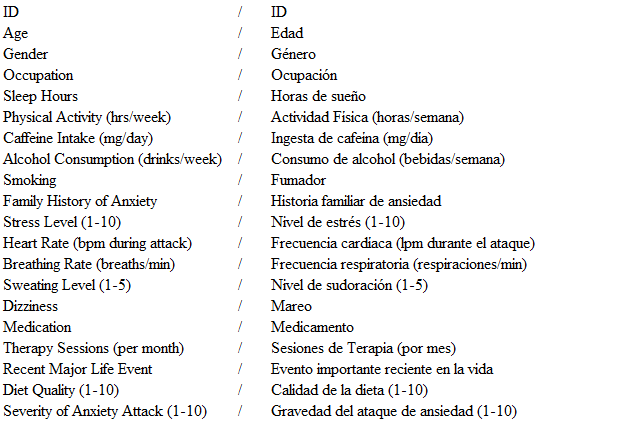

##CARGA DE DATOS Y ANALISIS PRELIMINAR

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [65]:
# URL del archivo en GitHub
url = 'https://raw.githubusercontent.com/osvaldoguti/AnxietyAttack/refs/heads/main/anxiety_attack_dataset.csv'

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(url)

# Muestra las primeras filas para verificar
df.head(10)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
5,6,38,Male,Student,6.7,9.9,194,16,No,Yes,2,174,25,3,No,Yes,2,Yes,1,8
6,7,56,Male,Doctor,3.8,7.5,411,13,Yes,Yes,2,81,22,4,No,No,5,Yes,10,10
7,8,36,Male,Teacher,4.9,0.5,413,4,No,No,3,88,36,5,No,Yes,6,No,4,2
8,9,40,Male,Doctor,6.2,9.0,284,6,No,No,4,121,28,2,No,No,0,No,5,4
9,10,28,Female,Doctor,8.3,9.3,148,18,No,Yes,5,145,12,4,No,No,3,No,10,4


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [67]:
df.describe().round(1)

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,6000.5,41.0,6.5,5.0,246.7,9.5,5.5,119.4,25.5,3.0,4.5,5.5,5.5
std,3464.2,13.5,2.0,2.9,144.5,5.8,2.9,34.8,8.1,1.4,2.9,2.9,2.9
min,1.0,18.0,3.0,0.0,0.0,0.0,1.0,60.0,12.0,1.0,0.0,1.0,1.0
25%,3000.8,29.0,4.8,2.5,122.0,5.0,3.0,89.0,18.0,2.0,2.0,3.0,3.0
50%,6000.5,41.0,6.5,5.0,244.0,9.0,5.0,119.0,25.0,3.0,5.0,5.0,6.0
75%,9000.2,53.0,8.2,7.5,371.0,15.0,8.0,149.0,32.0,4.0,7.0,8.0,8.0
max,12000.0,64.0,10.0,10.0,499.0,19.0,10.0,179.0,39.0,5.0,9.0,10.0,10.0


Con motivo de tener una primera aproximacion a la relacion entre las variables, se realiza un grafico de correlacion entre los atributos de cada instancia del Dataset

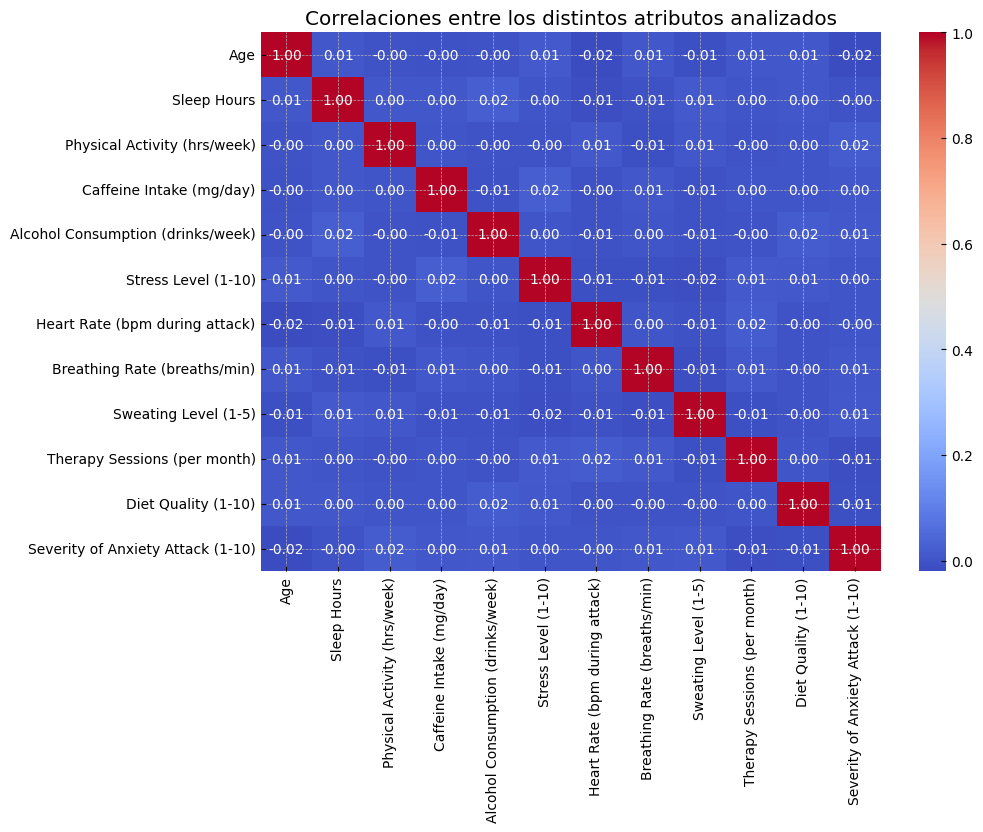

In [68]:
plt.figure(figsize=(10, 7))
corr_matrix = df[['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlaciones entre los distintos atributos analizados")
plt.show()

Para mejorar la visualizacion de los graficos se definio agregar una nueva columna por los valores de ultima columna. En lugar de una clasificacion del 1 a 10, se procedio a cambiar por una clasificacion en tres partes, "Leve" "Moderado" "Alto".

In [69]:
df['Severity Category'] = pd.cut(
    df['Severity of Anxiety Attack (1-10)'],
    bins=[0, 4, 7, 10],
    labels=['Leve', 'Moderado', 'Alto'],
    )

df[['Severity of Anxiety Attack (1-10)', 'Severity Category']].head(10)

,Severity of Anxiety Attack (1-10),Severity Category
0,10,Alto
1,8,Alto
2,5,Moderado
3,8,Alto
4,1,Leve
5,8,Alto
6,10,Alto
7,2,Leve
8,4,Leve
9,4,Leve


##ANALISIS DEL DATASET

###1. En un primer analisis, por medio de un grafico de dispersion (puntos) se quiere conocer si hay alguna relacion entre la categoria de los ataques de panico y el nivel de estress. Y ademas, se relaciona con las horas de terapia para ver si las mismas tienen incidencia.

<ipython-input-70-9281253367bf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_means = df.groupby('Severity Category')[['Therapy Sessions (per month)', 'Stress Level (1-10)']].mean().reset_index()


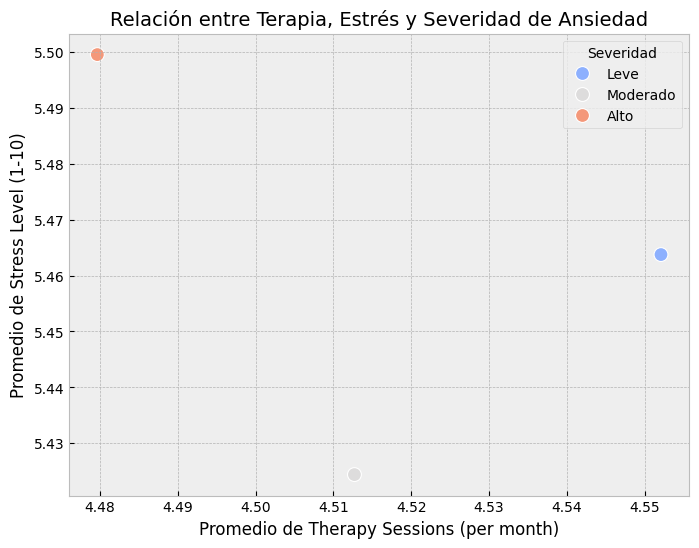

In [70]:
# Calcular los promedios para Therapy Sessions y Stress Level agrupados por Severity Category
severity_means = df.groupby('Severity Category')[['Therapy Sessions (per month)', 'Stress Level (1-10)']].mean().reset_index()

# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=severity_means['Therapy Sessions (per month)'],  # Eje X: promedio de sesiones de terapia
    y=severity_means['Stress Level (1-10)'],          # Eje Y: promedio de nivel de estrés
    hue=severity_means['Severity Category'],          # Colorear por categoría de severidad
    palette='coolwarm',                               # Paleta de colores
    s=100                                             # Tamaño de los puntos
)

# Etiquetas y título
plt.title("Relación entre Terapia, Estrés y Severidad de Ansiedad", fontsize=14)
plt.xlabel("Promedio de Therapy Sessions (per month)", fontsize=12)
plt.ylabel("Promedio de Stress Level (1-10)", fontsize=12)
plt.legend(title="Severidad", fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.show()

Vemos que el stress tiene una relacion directa con los casos que presentan mayor ataques de ansiedad. Tambien observamos que estos casos se podrian reducir aumentango la cantidad de horas de terapia.

###2. En una segunda etapa se intenta demostrar si la ocupacion que presentan las personas relevadas en la muestra tienen alguna incidencia en el nivel de los ataques de panico que presentan.

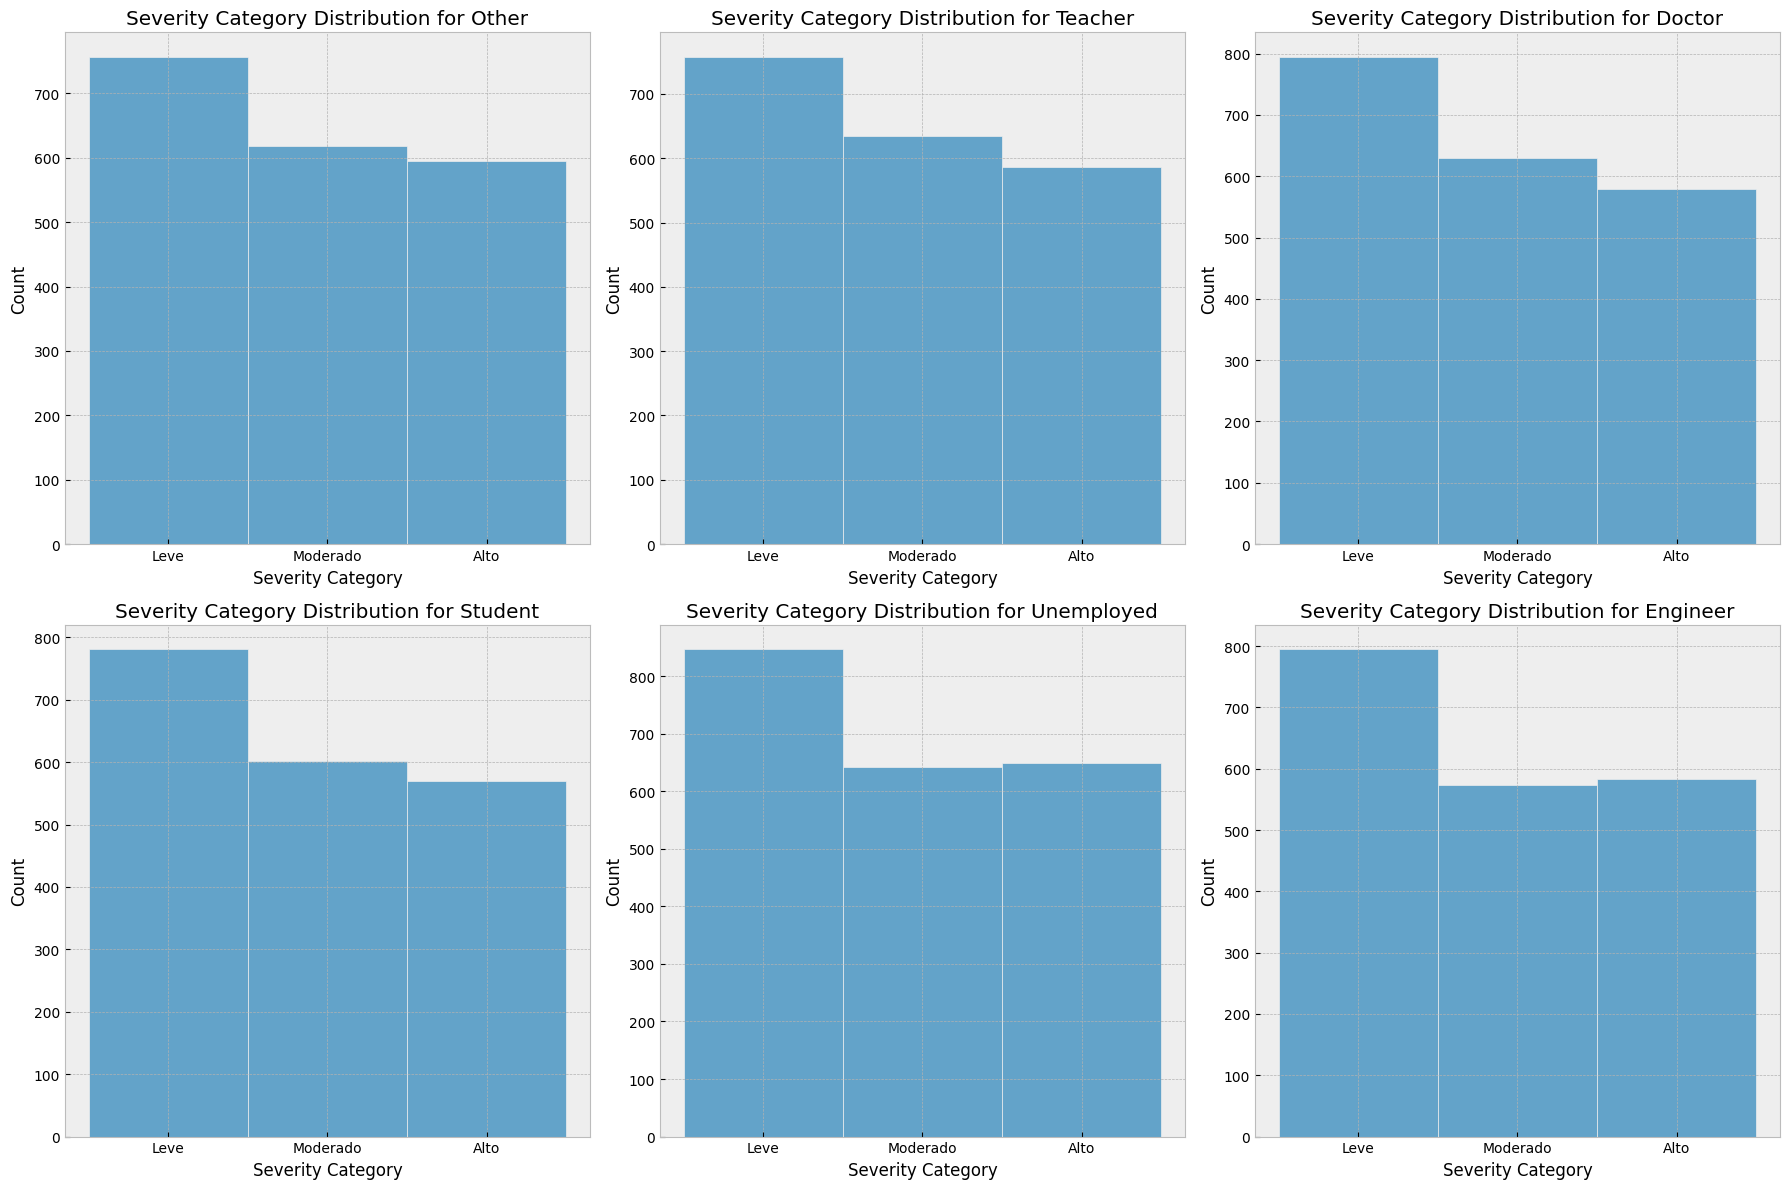

In [71]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Loop through occupations and create histograms
occupations = df['Occupation'].unique()
for i, occupation in enumerate(occupations):
    row = i // 3
    col = i % 3

    subset = df[df['Occupation'] == occupation]
    sns.histplot(ax=axes[row, col], x='Severity Category', data=subset, discrete=True)
    axes[row, col].set_title(f'Severity Category Distribution for {occupation}')
    axes[row, col].set_xlabel('Severity Category')
    axes[row, col].set_ylabel('Count')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

En los graficos no vemos que haya una relacion de los ataques de panico con la ocupacion de personas que participaron en el estudio realizado.

###3. En la ultima parte, se plantea si hay alguna relacion entre el genero de la persona y la reciente ocurrencia de un evento importante en la vida tanto en el nivel de stress como en el ritmo cardiaco.

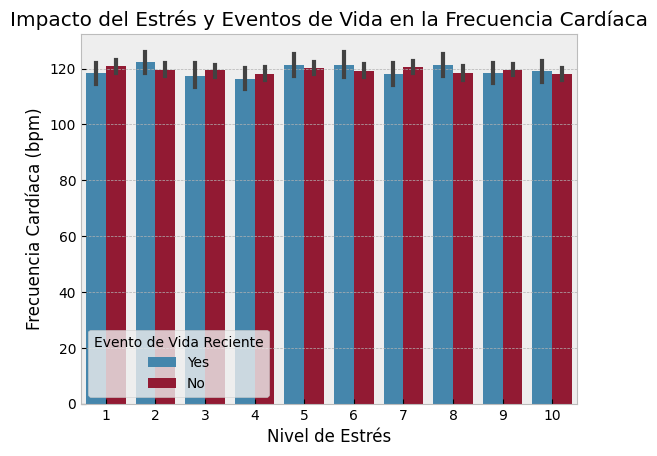

In [72]:
sns.barplot(
    data=df,
    x='Stress Level (1-10)',
    y='Heart Rate (bpm during attack)',
    hue='Recent Major Life Event'
)
plt.title("Impacto del Estrés y Eventos de Vida en la Frecuencia Cardíaca")
plt.xlabel("Nivel de Estrés")
plt.ylabel("Frecuencia Cardíaca (bpm)")
plt.legend(title="Evento de Vida Reciente")
plt.show()

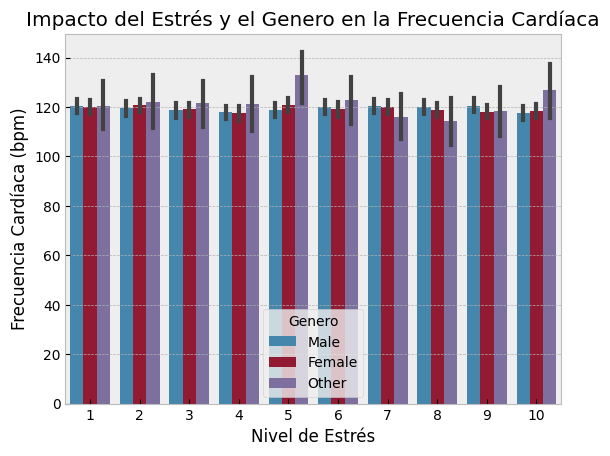

In [75]:
sns.barplot(
    data=df,
    x='Stress Level (1-10)',
    y='Heart Rate (bpm during attack)',
    hue='Gender'
)
plt.title("Impacto del Estrés y el Genero en la Frecuencia Cardíaca")
plt.xlabel("Nivel de Estrés")
plt.ylabel("Frecuencia Cardíaca (bpm)")
plt.legend(title="Genero")
plt.show()

En ambos casos no se detectan grandes diferencias tanto entre los distintos generos como entre la ocurrencia o no cercana de algun evente importante en la vida de estas personas.
Debido a que se nota en algunos casos una diferencia para que aquellas personas que se identifican como no binarias, se procedio a hacer un Boxplot para ver si estadisticamente se observaba algun error en la muestra.

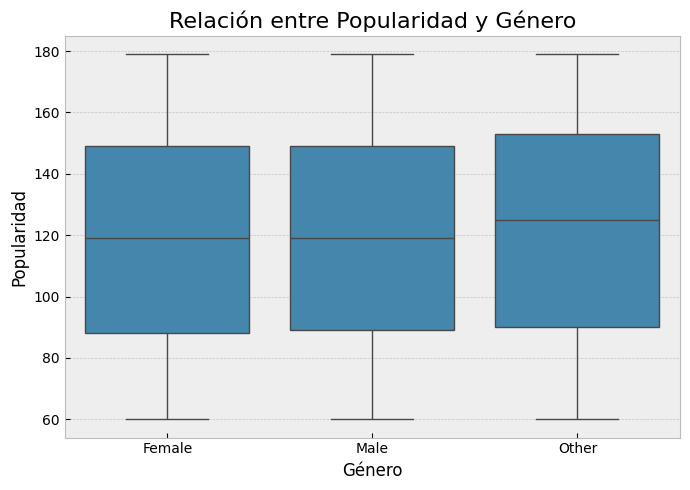

In [79]:
plt.figure(figsize=(7, 5))  # Ajustar el tamaño de la figura para mejor visibilidad
sns.boxplot(x='Gender', y='Heart Rate (bpm during attack)', data=df)
plt.title('Relación entre Popularidad y Género', fontsize=16) # Título más grande
plt.xlabel('Género', fontsize=12)  # Etiquetas de ejes más grandes
plt.ylabel('Popularidad', fontsize=12)
#plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula sutil
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

En el grafico queda demostrado que las personas que participaron en la muestra y que se consideran no binarias tiene en promedio, una frecuencia cardiaca por encima de las otras. Quedara para un analisis posterior si esto se corresponde con una error de la muestra o a alguna particularidad de este grupo


##CONCLUSIONES

#Por medio del analisis realizado vemos que los partipantes de la muestra no presentan una relacion directa marcada entre las distintas caracteristicas relevadas y el nivel de ataques de panico que padecen. Sin embargo, se ve que el factor que tiene una relactiva incidencia en este padecimiento es el nivel de stress y, por otro lado, se ve tambien que la cantidad de horas destinadas a terapia impactaria de una manera positiva.
